X_raw shape: (7352, 9, 128)
y_train shape: (7352,)
X_flat shape: (7352, 1152)


C:\ProgramData\anaconda33\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


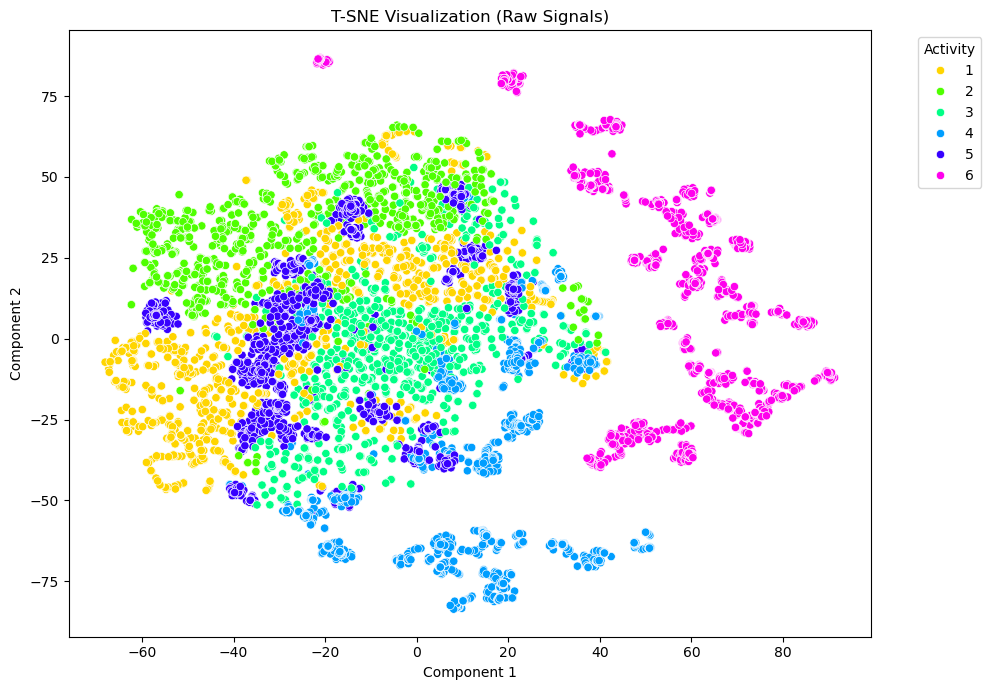

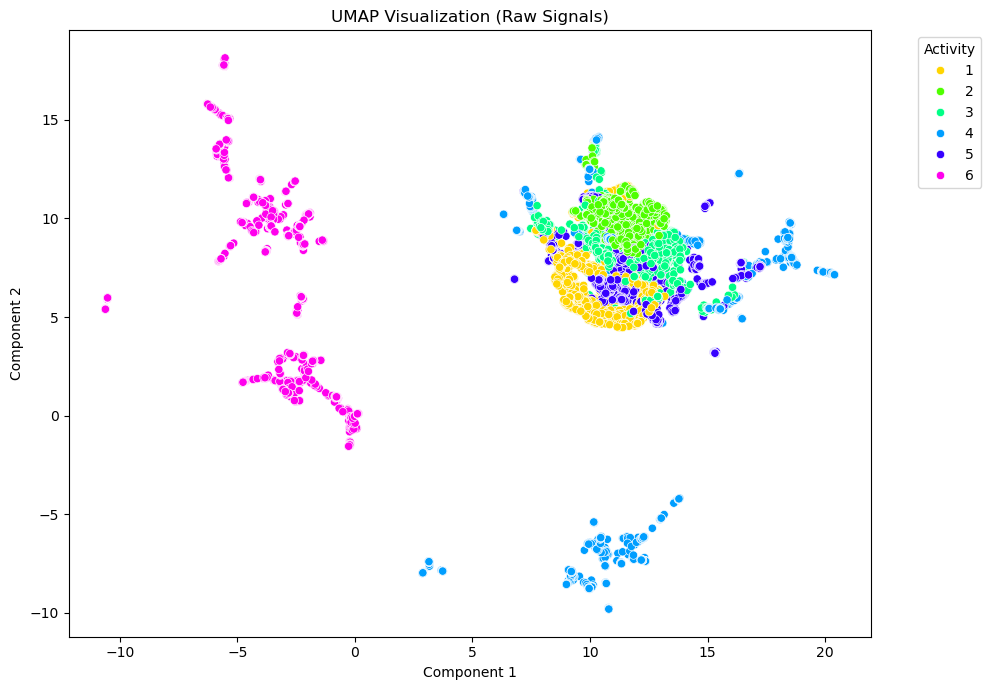

In [5]:
# ----------------- Import -----------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import seaborn as sns
import os

# ----------------- 1. Raw 데이터 로드 -----------------
# Inertial Signals 경로
base_path = 'E:/dataset/HAR/UCI-HAR/train/Inertial Signals/'

# 9개 파일 이름
signal_types = [
    'body_acc_x', 'body_acc_y', 'body_acc_z',
    'body_gyro_x', 'body_gyro_y', 'body_gyro_z',
    'total_acc_x', 'total_acc_y', 'total_acc_z'
]

# 각 파일을 읽어서 리스트에 저장
signals = []
for signal in signal_types:
    filepath = os.path.join(base_path, f'{signal}_train.txt')
    data = np.loadtxt(filepath)  # shape (7352, 128)
    signals.append(data)

# 리스트를 (7352, 9, 128) 형태로 스택
X_raw = np.stack(signals, axis=1)  # (7352, 9, 128)
print(f"X_raw shape: {X_raw.shape}")

# y 레이블
y_train = np.loadtxt('E:/dataset/HAR/UCI-HAR/train/y_train.txt').astype(int)
print(f"y_train shape: {y_train.shape}")

# ----------------- 2. Flatten (펼치기) -----------------
X_flat = X_raw.reshape(X_raw.shape[0], -1)  # (7352, 9*128=1152)
print(f"X_flat shape: {X_flat.shape}")

# ----------------- 3. T-SNE 임베딩 -----------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_flat)

# ----------------- 4. UMAP 임베딩 -----------------
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_flat)

# ----------------- 5. T-SNE 시각화 -----------------
plt.figure(figsize=(10, 7))
palette = sns.color_palette("hsv", np.unique(y_train).shape[0])
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train, palette=palette, legend='full')
plt.title('T-SNE Visualization (Raw Signals)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ----------------- 6. UMAP 시각화 -----------------
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_train, palette=palette, legend='full')
plt.title('UMAP Visualization (Raw Signals)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


X_raw shape: (2947, 9, 128)
y_train shape: (2947,)
X_flat shape: (2947, 1152)


C:\ProgramData\anaconda33\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


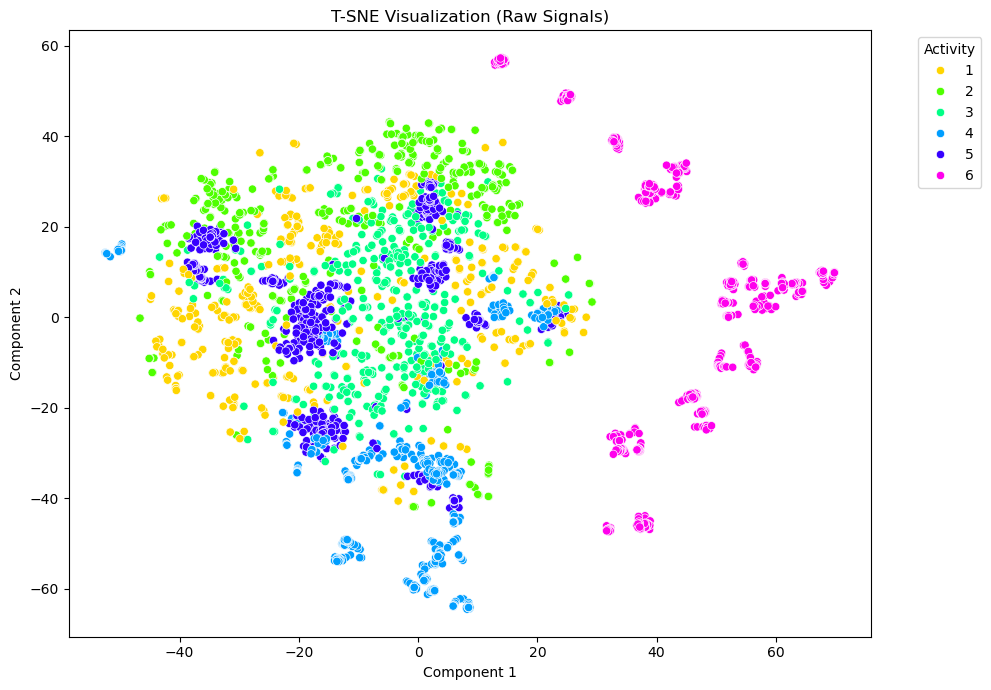

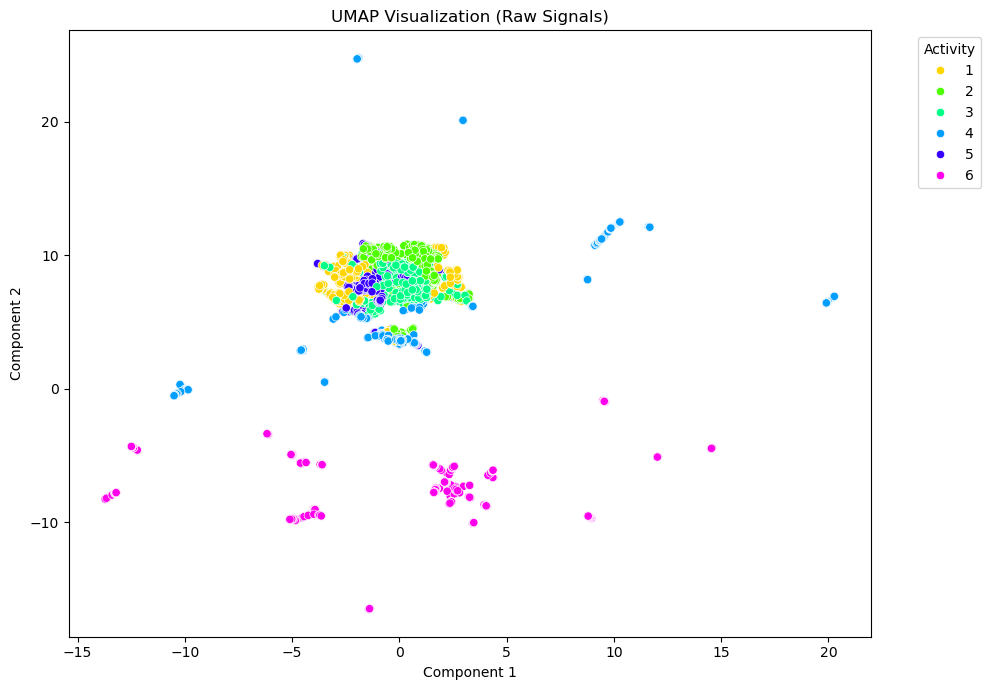

In [9]:

# ----------------- 1. Raw 데이터 로드 -----------------
# Inertial Signals 경로
base_path = 'E:/dataset/HAR/UCI-HAR/test/Inertial Signals/'

# 9개 파일 이름
signal_types = [
    'body_acc_x', 'body_acc_y', 'body_acc_z',
    'body_gyro_x', 'body_gyro_y', 'body_gyro_z',
    'total_acc_x', 'total_acc_y', 'total_acc_z'
]

# 각 파일을 읽어서 리스트에 저장
signals = []
for signal in signal_types:
    filepath = os.path.join(base_path, f'{signal}_test.txt')
    data = np.loadtxt(filepath)  # shape (7352, 128)
    signals.append(data)

# 리스트를 (7352, 9, 128) 형태로 스택
X_raw = np.stack(signals, axis=1)  # (7352, 9, 128)
print(f"X_raw shape: {X_raw.shape}")

# y 레이블
y_train = np.loadtxt('E:/dataset/HAR/UCI-HAR/test/y_test.txt').astype(int)
print(f"y_train shape: {y_train.shape}")

# ----------------- 2. Flatten (펼치기) -----------------
X_flat = X_raw.reshape(X_raw.shape[0], -1)  # (7352, 9*128=1152)
print(f"X_flat shape: {X_flat.shape}")

# ----------------- 3. T-SNE 임베딩 -----------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_flat)

# ----------------- 4. UMAP 임베딩 -----------------
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_flat)

# ----------------- 5. T-SNE 시각화 -----------------
plt.figure(figsize=(10, 7))
palette = sns.color_palette("hsv", np.unique(y_train).shape[0])
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train, palette=palette, legend='full')
plt.title('T-SNE Visualization (Raw Signals)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ----------------- 6. UMAP 시각화 -----------------
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_train, palette=palette, legend='full')
plt.title('UMAP Visualization (Raw Signals)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()